# METHOD of LINES (MOL)

Let's consider the function $V=V(t,x)$ and its derivative $\partial_{t} = L(V)$.
Method of Lines (MOL) amounts to the discretisation of PDE first in space. Thus we set up a grid of points ${x_{i}}$. Then for each ${x_{i}}$, the individual ODE is solved along a time. Therefore the PDE is expressed in the form of one variable, $t$, instead of $x$ and $t$ as it is in case of finite difference or finite element. Namely, the system of ODEs is solved coupled by linear or non-linear operator $\mathbb{L}$. In case of linear PDE, $\mathbb{L}$ is simply a matrix. For the non-linear, there is a matrix as well but depending itself on $V$ like in the Burger's eqn. 

Hence, we evaluate in terms of components of vector $\vec{v}$ which depends on time, $v_{i}=v(t,x_{i})$, with each component labeled by index $i$. So, in the general case, we can write
$$\frac{dv_{i}}{dt}=\mathbb{L}(\vec{v})$$
For the linear case we re-write our eqn as dot product of matrix $\mathbb{L}$ onto vector $\vec{v}$
$$\frac{dv_{i}}{dt}=\sum_{j} L_{ij} v_{j}=\mathbb{L}(\vec{v})$$

For a better illustration, for example, the simple advection eqn $\frac{\partial U}{\partial t}=c \frac{\partial U}{\partial x}$ for MOL purposes is written as $\frac{d\vec{u}}{\text{dt}}=\mathbb{L}\left(\vec{u}\right)=c.\mathbb{D}.\vec{u}$. Namely, there is an ODE for each component of $U$, that is $u_{1}, u_{2},...,u_{m}$. Again for N grid points we have N ODEs copled by linear or non-linear operator $\mathbb L$. I hope that this explains the MOL idea clearly. The next step is to apply explicit or implicit methods such as Runge-Kutta or Trapezoidal, respectively.   

Following our simple advection equation $\frac{\partial U}{\partial t}$, by Fundamental Theorem of Calculus we  integrate it in time forward (remember that $U$ is vectorised) as follows
$$U(t_{j+1})-U(t_{j}) = \int_{j}^{j+1} \mathbb{L} (U_{t}) \, dt$$ and approximate the integrand by Runge-Kutta or Trapezoidal or any other scheme. For any general case (linear or non) Runge-Kutta (RK) method is applicable. E.g., RK-3 TVD for the $M$ time discretisation is

$$
\begin{align}
U^{(1)}&=U^{(j)}+\Delta{t}\mathbb{L}(U^{(j)}) \\
U^{(2)}&=\frac{3}{4}U^{(j)}+\frac{1}{4}U^{(1)}+\frac{1}{4}\Delta{t}\mathbb{L}(U^{(1)}) \\
U^{(j)}&=\frac{1}{3}U^{(j)}+\frac{2}{3}U^{(2)}+\frac{2}{3}\Delta{t}\mathbb{L}(U^{(2)}) \\
\end{align}
$$

Fortunately, either advection eqn or Black-Scholes are linear so matrix $\mathbb{L}$ is constant, and hence we can pull $U$ out and harness scheme based on Taylor expansion of $U(t)$ about $t_{m}$which next is intgrated from $t_{j}$ to $t_{j+1}$ to obtain
$$U^{j}=[\mathbb{I}+\Delta\mathbb{L}+\frac{1}{2}\Delta\mathbb{L}^2+\frac{1}{3!}\Delta\mathbb{L}^3]\cdot U^j$$

Moreover, in the case of linearity, we can create and store matrix $\mathbb{L}=c\cdot \mathbb{D}$ (here the illustrative case of advection eqn) before the loop iterations. Note that matrix $\mathbb{D}$ can be either finite-difference or pseudo-spectral, or spectral, or so on.


### Stability
In the above $M=\mathbb{I}+\Delta\mathbb{L}+\frac{1}{2}\Delta\mathbb{L}^2+\frac{1}{3!}\Delta\mathbb{L}^3$ is a matrix whereas $\vec{U^{j}}$ is the set of time vectors arranged in matrix, i.e., matrix $M$ is dotted onto $\vec{U^{j}}$ vector at $t_{j}$. 
The explicit method is stable if the eigenvalues of $M$ are less or equal to 1, which is the Lax-Richmyer definition of stability. As the spectral radius of $\rho(M)$  satisfies $\rho(M)\leq ||M||$, it follows from the previous sentence that $\rho(M)\leq 1$. It imposes that the explicit method is stable conditionally on given $\Delta x$ and $\Delta t$ only.

### Black-Scholes (BS) equation
The Black-Scholes eqn is first order in time and second ordered in space parabolic linear equation 
$$\frac{\partial V(t,s)}{\partial s}+\frac{1}{2} s^2 \sigma ^2 \frac{\partial ^2V(t,s)}{\partial s^2}+\frac{\partial V(t,s)}{\partial t}-\text{rV}(t,s)=0$$
with the following closed-form solution 
$$V(t,s)=\frac{1}{2} e^{-r T} \left(\frac{s e^{r T} \left(\text{erfc} \left(2 k \log +\left(2 r+\sigma ^2\right) (t-T)-2 (s \log )\right)\right)}{2 \sqrt{2} \sigma  \sqrt{T-t}}-\frac{k e^{r t} \left(\text{erfc} \left(2 k \log +\left(2 r-\sigma ^2\right) (t-T)-2 (s \log )\right)\right)}{2 \sqrt{2} \sigma  \sqrt{T-t}}\right)$$
Input data are the price of the underlying asset $s$, strike price $K$, time to maturity T, interest rate r, and volatility $\sigma$. The price of the call option is $V(s,t)$.


The BS equation is parabolic, and its variables depend upon the time and price of underplaying asset. The BS model assumes that the option pricing is a continuous function of time, and the underlying asset price follows the geometric Brownian motion described by SDE
\begin{equation}
	  \frac{dS_t}{S_t} = \mu dt + \sigma dW_t
\end{equation}. 
That is why the BS equation can be derived from the Brownian process. As there is a deep connection between the Brownian process and the heat equation (Einstein relation), the original BS eqn can be easy transformed into the diffusion equation whose heat kernel evolves according to the normal distribution.
The BS eqn satisfies the terminal condition for the final pay-off $V(S_{t},T)=max(S_{t}-K,0)$.  The Dirichlet boundary conditions (BCs) at $S_{t}=0$ is $V(0,t)=0$ and since $S_{t}\longrightarrow +\infty$ then the boundary at $S_{t, max}$ is $V(S_{t,max},t)=S_{t}-KE^{-r(T-t)}$.

### MOL for the Black-Scholes equation
For $j = 0,1, ... Nt$, define the discrete time step $ \Delta t = \frac{T - t_0}{Nt} $ such that
$t_j = t_0 + j \Delta t$. For $i = 0,1, ... Ns$, define the discrete space step $ \Delta x = \frac{x_2 - x_1}{Ns} $ such that
$x_i = x_1 + i \Delta x$.
The grid points have the form  of $(t_0 + n \Delta t, x_1 + i \Delta x)$.
At this point, we concern ourselves only with the values of $V(t,x)$ on the grid nodes. Therefore if $j's$ are for rows and $i's$ are for columns, we have the grid

$$ V(t_0 + j \Delta t, x_1 + i \Delta x) = V_{j,i} $$

We are interested in the value of an option, V, at $t_{0}$, which means that BS eqn is a backward in time. We know the values $V(S_{t}, T)$ corresponding to the terminal conditions. The algorithm finds the values $V_{j}$ given the knowledge of the values $V_{j+1}$. For convenience, we can invert BS eqn by introducing a new variable $\tau = -t$ and change the variables in the PDE
$$\frac{\partial V}{\partial t}=\frac{\partial V}{\partial \tau}\frac{\partial \tau}{\partial t}=\frac{\partial V}{\partial \tau}\frac{\partial}{\partial t}(T-t)=-\frac{\partial V}{\partial \tau}$$
Given that the terminal conditions become initial conditions, and the eqn becomes a forward problem
$$\frac{\partial V(\tau,s)}{\partial \tau}  =\frac{1}{2} s^2 \sigma ^2 \frac{\partial ^2V(\tau,s)}{\partial s^2}+\frac{\partial V(\tau,s)}{\partial s}-\text{rV}(\tau,s)=0$$

As one can observe, there two partial derivatives terms to discretise, first and second orders respectively, by means of central differences
\begin{equation}
 \frac{\partial V(\tau,s)}{\partial s} \approx \frac{V(\tau, s+\Delta s) - V(\tau, s-\Delta s)}{2\Delta s} + \frac{1}{6} V^{(3)} ds^2
\end{equation}

However, the first and the last rows are populated by derivatives of the form
\begin{equation}
 \frac{\partial^2 V(\tau,s)}{\partial s^2} \approx \frac{-3V(\tau,s) + 4V(\tau,s+\Delta s) - V(\tau,s+2\Delta s)}{ \Delta s^2} + \frac{1}{3} V^{(3)} ds^2
\end{equation}

Analogically for the second derivative matrix
\begin{equation}
 \frac{\partial^2 V(\tau,s)}{\partial s^2} \approx \frac{V(\tau,s+\Delta s) + V(\tau,s-\Delta s) - 2V(\tau,s)}{ \Delta s^2} + \frac{11}{12} V^{(4)} ds^2
\end{equation}

\begin{equation}
 \frac{\partial^2 V(\tau,s)}{\partial s^2} \approx \frac{2 V(\tau,s) -5 V(\tau,s+\Delta s) + 4V(\tau,s+2\Delta s) +3\Delta s}{ \Delta s^2} + \frac{11}{12} V^{(4)} ds^2
\end{equation}

Now we are able to set up the difference matrices in price, $S$ with shape $(Ns-2, Ns-2)$ because i=0 and i=Ns are accupied by lateral boundary conditions.

Note that I applied the second-order polynomials (uses three points) to obtain finite difference formulae. In addition, I put formulae from third-order polynomials in the first and last rows. This technique decreases the error of estimation considerably and accommodates boundary conditions in a pretty nice manner, which is not always apparent for approaches for BS aquation without log variable transformation.

As a result, the first and second-order differentiation matrices have a form $$\mathbb{D}^{(1)}=\frac{1}{2ds}\mathbb{L}^{(1)}=\frac{1}{2ds}\left(
\begin{array}{ccccc}
-3     & 2  & -1 & 0  & \cdots & 0 \\
-1     & 0  & 1 & 0  & 0 & 0 \\
0      & \ddots & \ddots &   \ddots     & \ddots  & 0\\
\vdots & 0 & -1 & 0  & 1 & 0 \\
0 & 0 & 0 & -1  & 0 & 1 \\
0      & 0 & 0 & -1  & -2 & 3\\
\end{array}
\right)$$ and $$\mathbb{D}^{(2)}=\frac{1}{2ds^2}\mathbb{L}^{(2)}=\frac{1}{2ds^2}\left(
\begin{array}{ccccc}
2     & -5  & 4 & -1  & \cdots & 0 \\
1     & -2  & 1 & 0  & 0 & 0 \\
0      & \ddots & \ddots &   \ddots     & \ddots  & 0\\
\vdots & 0 & 1 & -2  & 1 & 0 \\
0 & 0 & 0 & 1  & -2 & 1 \\
0      & 0 & -1 & 4  & -5 & 2\\
\end{array}
\right)$$ , respectivelly.
Moreover
$$\mathbb{R} = r\left(
\begin{array}{ccccc}
1     & 0  & 0 & \cdots  & 0 \\
0     & 1  & 0 & 0  & 0  \\
0     &  0 & 1 & 0  & 0  \\
0      & \ddots & \ddots &   \ddots     & 0  \\
\vdots & 0 & 0 & 1  & 0  \\
0      & 0 & 0 & 0  & 1 \\
\end{array}
\right)$$

Therefore we write BS eqn in the vectorised form as a system of ODEs

$$\frac{\partial V(\tau)}{\partial \tau}=\frac{d\vec{V(\tau)}}{\text{dt}}=\frac{1}{2}\sigma ^2S_i\mathbb{D}^{(2)}.\vec{V(\tau)}+\text{r} S_{i}\mathbb{D}^{(1)}.\vec{V(\tau)}-r\vec{V(\tau)}= \left(\frac{1}{2}\sigma ^2S_t\mathbb{D}^{(2)}+\text{r} S_{i}\mathbb{D}^{(1)}-\mathbb{R} \right)\cdot\vec{V(\tau)}=\mathbb{M}\cdot\vec{V(\tau)}$$

As in the introduction, using the Fundamental Theorem of Calculus
$$\frac{d\vec{V(\tau)}}{d\tau}=V(\tau_{j+1})-V(\tau_{j}) = \int_{j}^{j+1} \mathbb{M}\cdot V_{\tau} \, dt$$
where the last term is approximated by Runge-Kutta or Taylor integrators. For example, for the latter to populate PDE, $V(\tau, s)$, matrix, we directly place it in a loop  
$$V_{j+1}=\left(\mathbb{I}+\mathbb{M}\Delta \tau+\frac{\Delta \tau}{2}\mathbb{M}\cdot\mathbb{M} +\frac{\Delta \tau^2}{3!}\mathbb{M}\cdot\mathbb{M}\cdot\mathbb{M}\right)\cdot V_{j}$$ or even higher order.
Equivalently, one can harness Runge-Kutta instead.

### Implementation
Following the above recipe we will compute the price of the EU option at $t_{0}$ for $K$=100, $S_{0}$=100, $T$=12/12, $r$=0.05, $\sigma$=0.2.
Bear in mind that the matrix operator has dimensions $(Ns-1\, x\, Ns-1)$. The first and the last rows are for lateral boundaries.

In [433]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#!conda install -c conda-forge jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=True)

def mol_col(S0, K, sig, r, Texpir, Ns, Nt, plotti=False):
    """Computes price of call be means of Method of Lines"""
    #Set domain
    S_max = 4*float(K)                
    S_min = float(K)/4
    #Grids
    S, ds = np.linspace(S_min,S_max, Ns, retstep=True)
    T, dt = np.linspace(0, Texpir, Nt, retstep=True) 
    V = np.zeros((Ns,Nt)) 
    Payoff = np.maximum(S-K,0) 
    B = np.zeros(Ns-2) 
    #Boundaries
    V[:,0] = Payoff
    upper = np.zeros_like(T)
    lower = S_max - K * np.exp(-r* T[::-1])
    #Matrix constructor
    s = S[1:-1] #vector of stock values
    s1= s[:, None] #add axis
    ds2 = ds*ds
    sig2 = sig*sig

    D1 = np.zeros((Ns-2, Ns-2))
    for i in range(0, Ns-3):           
        D1[i+1,i]=-1.
        D1[i,i+1]=1.

    D1[0,0]=-3.
    D1[-1,-1]=3.
    D1[0,2]=-1.
    D1[0,1]=2.
    D1[-1,-2]=-4
    D1[-1,-3]=1.
    #Firs derivative matrix
    D1 = (r/(2*ds))*s1*D1

    D2=np.zeros((Ns-2,Ns-2))
    for i in range(0,Ns-2):
        D2[i,i]=-2.

    for i in range(0, Ns-3):           
        D2[i+1,i]=1.
        D2[i,i+1]=1.

    D2[0,1]=D2[-1,-2]=-2.
    D2[0,1]=D2[-1,-2]=-5.
    D2[0,2]=D2[-1,-3]=4.
    D2[0,3]=D2[-1,-4]=-1.
    D2[0,0]=D2[-1,-1]=2
    #Second derivative matrix
    D2 = (sig2/(2*(ds2)))*(s1**2)*D2
    
    #Constant term matrix
    D3  = -r*np.eye(Ns-2)
    
    #Construction op operator of third either third or fourth, or fith order here
    #Remember that RK-3 TVD is slightly better than Taylor-3 as there is some variance reduction
    #in the firs. In addition, RK-3 is applicable to non-linear eqn, Taylor not!
    L = D2+D1+D3
    II = np.eye(Ns-2)
    M = II + dt*L + ((dt**2)/2)*L@L + (dt**3/6)*L@L@L + (dt**4/24)*L@L@L@L + (dt**5/120)*L@L@L@L@L
    
    #Solver of ODEs' system
    for j in range(0, Nt-1): 
        V[1:-1,j+1] =np.dot(M,(V[1:-1,j]))
        #You can choose Runge-Kutta integrator if you wish
#         V1 = V[1:-1, j]+dt*np.dot(L, V[1:-1, j])
#         V2 = (3/4)*V[1:-1,j] + (1/4)*V1 + dt*(1/4)*np.dot(L, V1)
#         V[1:-1, j+1] = (1/3)*V[1:-1, j] + (2/3)*V2 + dt*(2/3)*np.dot(L, V2)
        V[0,j+1] = upper[j]
        V[-1,j+1] = lower[j]

    oPrice = np.interp(S0, S, V[:,-1])
    
    if plotti:
        fig = plt.figure(figsize=(18,8))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122, projection='3d')

        ax1.plot(S, Payoff, color='deeppink',label="Payoff")
        ax1.plot(S, V[:,-1], color='dodgerblue',label="BS curve")
        ax1.set_xlim(50,150); ax1.set_ylim(0,40)
        ax1.set_xlabel("S"); ax1.set_ylabel("price")
        ax1.legend(loc='upper left'); ax1.set_title("BS price at t=0")

        X, Y = np.meshgrid(T[::-1], S)
        ax2.plot_surface(Y, X, V, cmap=cm.gist_ncar)
        ax2.set_title("BS price surface")
        ax2.set_xlabel("S"); ax2.set_ylabel("t"); ax2.set_zlabel("V")
        ax2.view_init(30, -100) # this function rotates the 3d plot
        plt.show()

    #Remember to put analytic price of your option     
    print('The price of call option is: {} with error: {}'.format(oPrice, np.abs(oPrice - 13.269676584660893))) 

Now we are ready to test our pricer and plot 

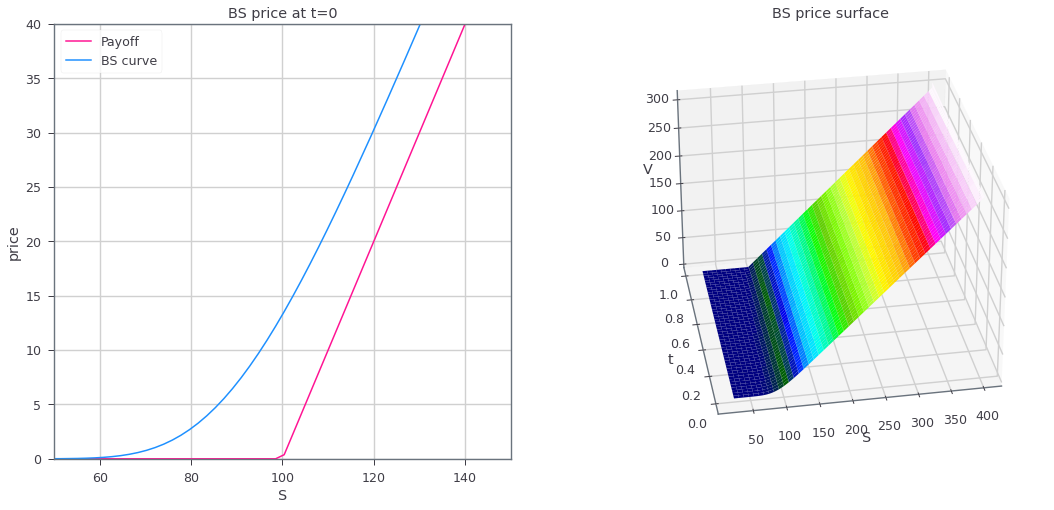

The price of call option is: 13.27000148547939 with error: 0.00032490081849800845


In [434]:
#Inputs    
r = 0.1
sig = 0.2                
S0 = 100.          
K = 100. 
Texpir = 1.
Ns = 200
Nt = 1200

mol_col(S0, K, sig, r, Texpir, Ns, Nt, plotti=True)

Let's test the extreme example to test what accuracy is achievable.

In [430]:
r = 0.1
sig = 0.2                
S0 = 100.          
K = 100. 
Texpir = 1.
Ns = 1000
Nt = 30000

mol_col(S0, K, sig, r, Texpir, Ns, Nt, plotti=False)

The price of call option is: 13.269687798211548 with error: 1.1213550655142512e-05
